In [253]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
from IPython.display import display

In [254]:
import os
from pathlib import Path
dirpath = './uHoo/'
paths = sorted(Path(dirpath).glob("*.xlsx"), key=os.path.basename)
raw_udf = pd.concat([pd.read_excel(f, header=None) for f in paths])
raw_udf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date/time,Instance,Sensor,Value,Units,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
1,"February 15, 2020 at 04:19PM",Walnut,Air Pressure,1010.97,mbar,21.4,33.9,7.9,807,0,53,21.9,7.9,1011
2,"February 15, 2020 at 04:20PM",Walnut,Air Pressure,1011,mbar,21.4,33.9,7.9,808,0,55,22.1,7.9,1011
3,"February 15, 2020 at 04:23PM",Walnut,Air Pressure,1011.07,mbar,21.4,33.8,7.3,808,0,55,21.1,7.8,1011.1
4,"February 15, 2020 at 04:24PM",Walnut,Air Pressure,1011.1,mbar,21.4,33.9,7.6,812,0,55,22.4,7.9,1011.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,"March 1, 2022 at 05:08AM",Walnut,Air Pressure,1009.21,mbar,17.9,33.1,5,457,0,20,53.1,9.7,1009.2
1600,"March 1, 2022 at 05:09AM",Walnut,Air Pressure,1009.15,mbar,17.9,32.3,5,461,0,20,52.3,9.6,1009.1
1601,"March 1, 2022 at 06:06AM",Walnut,Air Pressure,1008.82,mbar,17.9,30.5,8,463,0,41,58.5,9.8,1008.8
1602,"March 1, 2022 at 06:07AM",Walnut,Air Pressure,1008.85,mbar,17.8,31.5,5,462,0,41,55.6,9.7,1008.9


In [255]:
udf = raw_udf.copy()

# turn first row into column labels
udf.columns = udf.iloc[0]

# Drop the column data row
udf = udf.iloc[1:]

# Drop useless columns
udf = udf.drop(['Instance', 'Sensor', 'Value', 'Units'], axis=1)

# Convert first column to date type
udf['Date/time'] = pd.to_datetime(udf['Date/time'], format="%B %d, %Y at %I:%M%p")

# Convert everything else to numeric
interior_cols = ['Temperature','Humidity','PM2.5','CO2','CO','TVOC','NO2','Ozone','Pressure']
udf[interior_cols] = udf[interior_cols].apply(pd.to_numeric)

# Renumber from zero
udf = udf.reset_index(drop=True)

# Set date/time index
udf = udf.set_index('Date/time')
udf['datetime'] = udf.index

udf.head()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime
Date/time,,,,,,,,,,
2020-02-15 16:19:00,21.4,33.9,7.9,807,0.0,53,21.9,7.9,1011.0,2020-02-15 16:19:00
2020-02-15 16:20:00,21.4,33.9,7.9,808,0.0,55,22.1,7.9,1011.0,2020-02-15 16:20:00
2020-02-15 16:23:00,21.4,33.8,7.3,808,0.0,55,21.1,7.8,1011.1,2020-02-15 16:23:00
2020-02-15 16:24:00,21.4,33.9,7.6,812,0.0,55,22.4,7.9,1011.1,2020-02-15 16:24:00
2020-02-15 16:25:00,21.4,33.9,7.4,813,0.0,54,21.5,7.9,1011.1,2020-02-15 16:25:00


In [256]:
udf.describe()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
count,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000,52681.000000
mean,21.636465,41.753378,2.310634,754.625368,0.014210,151.947419,17.925527,7.790251,1000.667227
std,1.762421,10.921825,2.813047,201.405182,0.178755,229.485451,21.146656,0.997603,7.259274
min,12.500000,10.700000,1.000000,400.000000,0.000000,0.000000,0.000000,3.600000,971.800000
25%,21.400000,31.800000,1.000000,569.000000,0.000000,24.000000,0.800000,7.100000,996.000000
50%,22.100000,42.100000,1.000000,775.000000,0.000000,70.000000,10.200000,7.600000,1000.200000
75%,22.700000,51.300000,3.000000,900.000000,0.000000,171.000000,27.900000,8.100000,1005.400000
max,27.400000,82.000000,123.200000,2050.000000,7.900000,1200.000000,181.400000,13.600000,1025.200000


<AxesSubplot: xlabel='Date/time'>

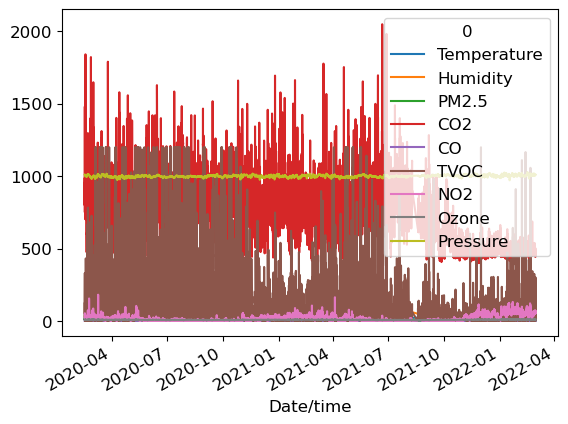

In [257]:
udf[interior_cols].plot.line()
#udf[interior_cols].plot.scatter(x='Pressure', y='Date/time')

<AxesSubplot: xlabel='Date/time'>

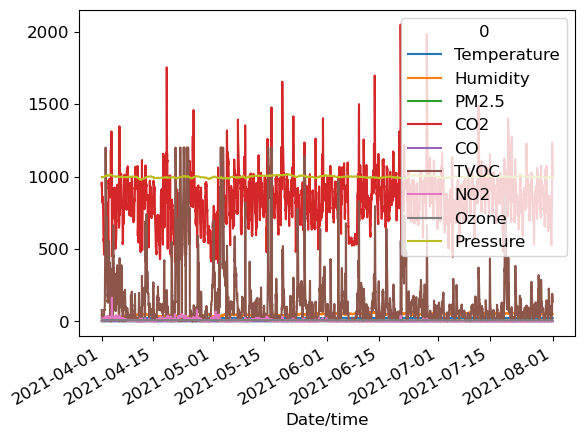

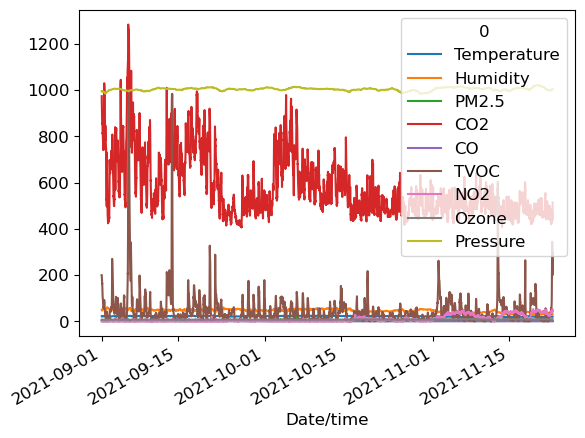

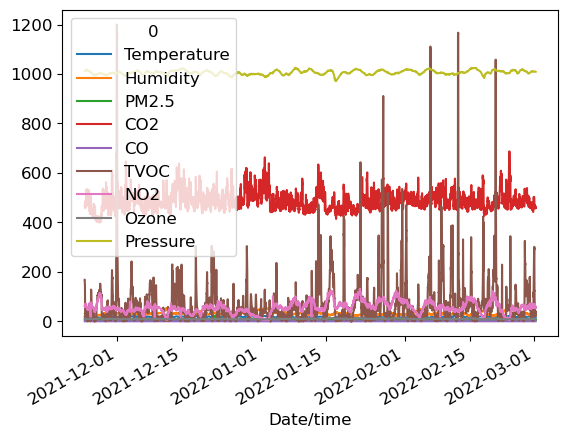

In [258]:
# separate 3 sensor locations 
#df1 = udf.loc[:, (udf['datetime'] >= '2021-04-01') & (udf['datetime'] < '2021-08-01')]
#df2 = udf.loc[:, (udf['datetime'] >= '2021-09-01') & (udf['datetime'] < '2021-11-23')]
#df3 = udf.loc[:, (udf['datetime'] >= '2021-11-24')]

#cond1 = (udf.datetime>='2021-04-01') & (udf.datetime < '2021-08-01')
df1 = udf[(udf.datetime>='2021-04-01') & (udf.datetime < '2021-08-01')].copy()
df2 = udf[(udf['datetime'] >= '2021-09-01') & (udf['datetime'] < '2021-11-23')].copy()
df3 = udf[(udf['datetime'] >= '2021-11-24')].copy()

#idx1 = np.where( cond1)[0]

#df1 = udf[idx1].copy()
#df1.describe()
#splits = (list(train_idx), list(valid_idx))

df1[interior_cols].plot.line()
df2[interior_cols].plot.line()
df3[interior_cols].plot.line()

In [259]:
df1.describe()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,22.940902,46.257979,1.225453,839.369101,0.026861,133.070613,5.684678,7.207084,998.055717
std,0.578999,8.989836,0.978624,170.236230,0.271971,199.095457,8.979318,0.385382,5.929143
min,20.400000,11.600000,1.000000,400.000000,0.000000,0.000000,0.000000,4.300000,978.600000
25%,22.600000,40.500000,1.000000,734.500000,0.000000,23.000000,0.500000,7.000000,994.000000
50%,22.900000,48.500000,1.000000,853.000000,0.000000,66.000000,0.900000,7.200000,997.900000
75%,23.300000,53.100000,1.000000,941.000000,0.000000,144.000000,7.500000,7.400000,1001.850000
max,27.400000,65.400000,21.000000,2050.000000,7.900000,1200.000000,163.800000,13.000000,1015.600000


In [260]:
from fastai.tabular.core import add_datepart
#add_datepart(df1, 'datetime', drop=False)
df1.reset_index(drop=True, inplace=True)
df1

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime
0,22.8,40.7,1.0,951,0.0,78,3.1,7.1,994.1,2021-04-01 00:11:00
1,22.8,40.5,1.0,955,0.0,77,3.0,7.1,994.0,2021-04-01 00:11:00
2,22.8,40.6,1.0,959,0.0,71,4.7,7.2,994.2,2021-04-01 00:12:00
3,22.5,40.7,1.0,928,0.0,37,4.2,7.2,994.3,2021-04-01 01:09:00
4,22.6,40.7,1.0,934,0.0,38,4.9,7.2,994.3,2021-04-01 01:10:00
...,...,...,...,...,...,...,...,...,...,...
8662,22.2,50.2,1.0,1068,0.0,158,0.0,7.2,995.8,2021-07-31 22:08:00
8663,22.2,50.2,1.0,1071,0.0,158,0.4,7.2,995.8,2021-07-31 22:09:00
8664,22.3,47.5,1.0,997,0.0,147,0.6,7.2,995.7,2021-07-31 23:06:00
8665,22.3,50.7,1.0,998,0.0,142,0.6,7.2,995.7,2021-07-31 23:07:00


In [261]:
weatherDataFile = "WU_20210401-20210801.txt"
wdf = pd.read_csv('uHoo/'+weatherDataFile, delimiter='\t')
exterior_cols = [c for c in wdf.columns if c!='Date']

# Convert first column to date type
wdf['Date'] = pd.to_datetime(wdf['Date'], format="%m/%d/%y")

# Set date/time index
wdf = wdf.set_index('Date')
wdf['date'] = wdf.index

wdf.head()

,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total,date
Date,,,,,,,,,,,,,,,,,
2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88,2021-04-01
2021-04-02,45,36.8,29,18,13.5,10,56,40.0,26,23,15.4,9,30.0,29.9,29.9,0.00,2021-04-02
2021-04-03,56,41.5,25,21,16.5,13,75,40.2,20,13,4.8,0,30.1,30.0,29.9,0.00,2021-04-03
2021-04-04,72,55.8,35,34,28.0,22,70,38.1,19,17,8.3,0,29.9,29.8,29.6,0.00,2021-04-04
2021-04-05,73,58.7,38,39,31.9,26,76,39.5,22,10,6.1,0,29.8,29.7,29.6,0.00,2021-04-05


In [262]:
# add date (without time) column for join
df1['date'] = pd.to_datetime(df1['datetime'].dt.date)

# Create merged data set
mdf = df1.merge(wdf, on=["date"], how="outer")

# Add derivatives
#for col in interior_cols:
#    mdf["%s_diff"%col] = mdf[col].diff(periods=2)

#for col in exterior_cols:
#    mdf["%s_diff"%col] = mdf[col].diff(periods=24)

# Add rain prediction column
#mdf['Rain'] = np.where(mdf['PrecipitationIN_Total']>0.0, True, False)

# Show
#mdf.info()
mdf

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,datetime,date,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total
0,22.8,40.7,1.0,951,0.0,78,3.1,7.1,994.1,2021-04-01 00:11:00,2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88
1,22.8,40.5,1.0,955,0.0,77,3.0,7.1,994.0,2021-04-01 00:11:00,2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88
2,22.8,40.6,1.0,959,0.0,71,4.7,7.2,994.2,2021-04-01 00:12:00,2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88
3,22.5,40.7,1.0,928,0.0,37,4.2,7.2,994.3,2021-04-01 01:09:00,2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88
4,22.6,40.7,1.0,934,0.0,38,4.9,7.2,994.3,2021-04-01 01:10:00,2021-04-01,49,41.9,33,43,31.0,17,93,67.5,42,30,17.0,5,29.9,29.7,29.6,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,22.2,50.2,1.0,1068,0.0,158,0.0,7.2,995.8,2021-07-31 22:08:00,2021-07-31,83,74.0,67,62,57.0,53,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.00
8663,22.2,50.2,1.0,1071,0.0,158,0.4,7.2,995.8,2021-07-31 22:09:00,2021-07-31,83,74.0,67,62,57.0,53,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.00
8664,22.3,47.5,1.0,997,0.0,147,0.6,7.2,995.7,2021-07-31 23:06:00,2021-07-31,83,74.0,67,62,57.0,53,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.00
8665,22.3,50.7,1.0,998,0.0,142,0.6,7.2,995.7,2021-07-31 23:07:00,2021-07-31,83,74.0,67,62,57.0,53,68,55.9,42,8,5.5,0,29.7,29.6,29.6,0.00


In [263]:
from fastbook import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import *

In [264]:
interior_cols

['Temperature',
 'Humidity',
 'PM2.5',
 'CO2',
 'CO',
 'TVOC',
 'NO2',
 'Ozone',
 'Pressure']

In [265]:
from fastai.tabular.all import *
    
train_idx = np.where((mdf.date<'2021-06-20'))[0]
valid_idx = np.where((mdf.date>='2021-06-20'))[0]
splits = (list(train_idx), list(valid_idx))

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

len(train_idx), len(valid_idx)

(5699, 2968)


Predicting PrecipitationIN_Total (0.00 - 1.14)
Train RMSE: 0.14 (norm: 0.12)
Valid RMSE: 0.29


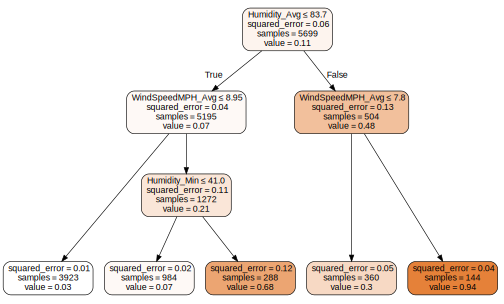

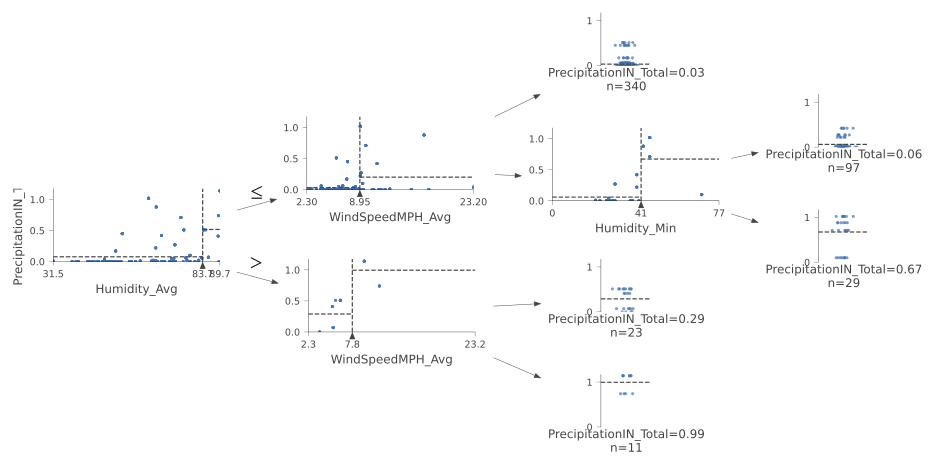

In [266]:
dep_var = 'PrecipitationIN_Total'

# Create final training data frame
tdf = mdf.copy()
# Drop useless columns
tdf = tdf.drop(['datetime','date'], axis=1)
# Fix for https://forums.fast.ai/t/tabular-learner-error-found-dtype-char-but-expected-float/77245/12
tdf = tdf.astype({dep_var: np.float16}) 

cont,cat = cont_cat_split(tdf, 1, dep_var=dep_var)
to = TabularPandas(tdf, [Categorify, FillMissing], cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = DecisionTreeRegressor(max_leaf_nodes=5)
m.fit(xs, y)

min = tdf[dep_var].min()
max = tdf[dep_var].max()
t_rmse = m_rmse(m, xs, y)
norm_rmse = t_rmse / (max - min)
print()
print("Predicting %s (%2.2f - %2.2f)" % (dep_var,min,max))
print("Train RMSE: %2.2f (norm: %2.2f)" % (t_rmse, norm_rmse))
print("Valid RMSE: %2.2f" % m_rmse(m, valid_xs, valid_y))

g1 = draw_tree(m, xs, size=7, leaves_parallel=True, precision=2);
display(g1)

samp_idx = np.random.permutation(len(y))[:500]
g2 = dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR');
display(g2)

<AxesSubplot: xlabel='Humidity_Avg', ylabel='PrecipitationIN_Total'>

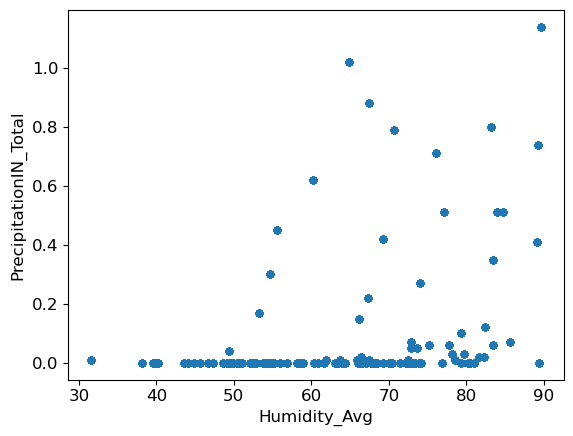

In [288]:
#mdf.plot.scatter(x='Pressure', y='PressureIN_Max')
#mdf.plot.scatter(x='TempF_Max', y=['Temperature'])
#mdf.plot.scatter(x='Ozone', y=['NO2'])
mdf.plot.scatter(x='Humidity_Avg', y='PrecipitationIN_Total')

In [289]:
def rf(xs, y, n_estimators=40, max_samples=100_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

m = rf(xs, y, n_estimators=7, max_samples=200);
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y), r_mse(m.oob_prediction_, y)

(0.072218, 0.258263, 0.073788)

In [269]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
vdf = to.valid.copy()
vdf['pred_mean'] = pd.Series(preds.mean())
vdf['pred_std'] = pd.Series(preds.std(0))
pd.DataFrame(data=vdf.xs, columns=vdf.x_names)


,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min
5699,23.600000,53.299999,1.0,948,0.0,67,0.8,6.8,992.400024,91,78.400002,66,71,69.0,65,97,75.199997,48,12,5.6,0,29.600000,29.5,29.4
5700,23.600000,53.200001,1.0,950,0.0,67,0.8,6.8,992.400024,91,78.400002,66,71,69.0,65,97,75.199997,48,12,5.6,0,29.600000,29.5,29.4
5701,23.700001,53.500000,1.0,947,0.0,67,0.5,6.9,992.400024,91,78.400002,66,71,69.0,65,97,75.199997,48,12,5.6,0,29.600000,29.5,29.4
5702,23.400000,52.700001,1.0,933,0.0,54,0.5,7.0,992.500000,91,78.400002,66,71,69.0,65,97,75.199997,48,12,5.6,0,29.600000,29.5,29.4
5703,23.299999,53.000000,1.0,936,0.0,53,0.8,7.0,992.599976,91,78.400002,66,71,69.0,65,97,75.199997,48,12,5.6,0,29.600000,29.5,29.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,22.200001,50.200001,1.0,1068,0.0,158,0.0,7.2,995.799988,83,74.000000,67,62,57.0,53,68,55.900002,42,8,5.5,0,29.700001,29.6,29.6
8663,22.200001,50.200001,1.0,1071,0.0,158,0.4,7.2,995.799988,83,74.000000,67,62,57.0,53,68,55.900002,42,8,5.5,0,29.700001,29.6,29.6
8664,22.299999,47.500000,1.0,997,0.0,147,0.6,7.2,995.700012,83,74.000000,67,62,57.0,53,68,55.900002,42,8,5.5,0,29.700001,29.6,29.6
8665,22.299999,50.700001,1.0,998,0.0,142,0.6,7.2,995.700012,83,74.000000,67,62,57.0,53,68,55.900002,42,8,5.5,0,29.700001,29.6,29.6


<AxesSubplot: ylabel='cols'>

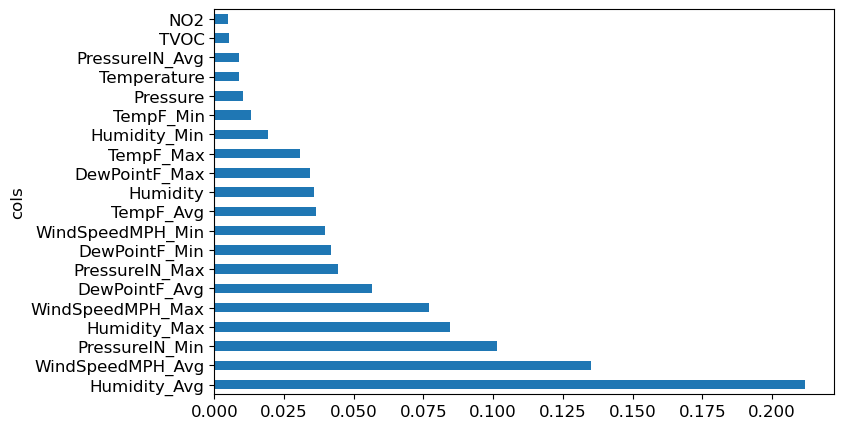

In [276]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
#fi[:10]

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(8,5), legend=False)
plot_fi(fi[:20])



In [251]:
# random forest parameter search
i_range = range(0,5) # number of trials per parameter set
s_range = range(200,2000,200) # max_samples
n_range = range(1,50,2) # n_estimators

import numpy as np
param_arr = np.zeros((2, len(i_range), len(s_range), len(n_range)))
param_arr.shape

(2, 5, 9, 25)

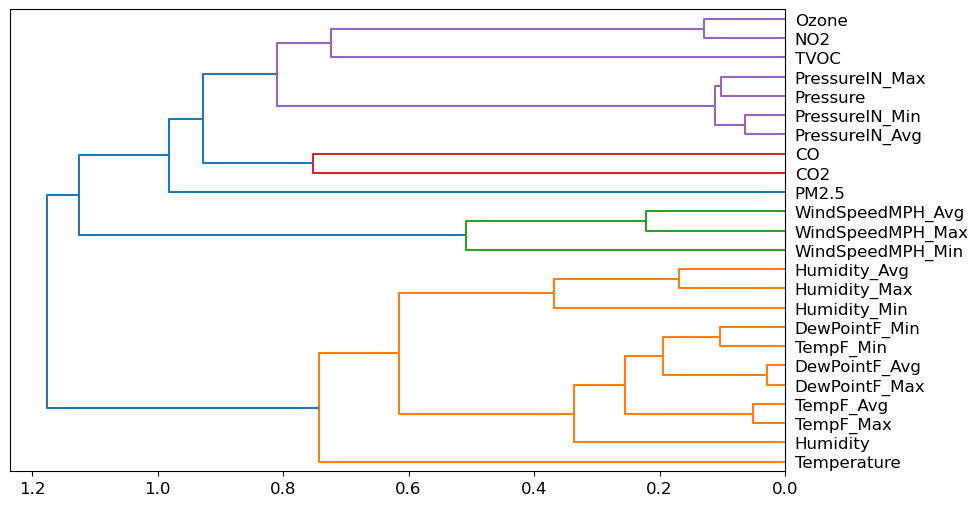

In [279]:
# rank correlation of column values
cluster_columns(xs)

In [280]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

for i in i_range:
    j = 0
    for s in s_range:
        k = 0
        for n in n_range:
            m = rf(xs, y, n_estimators=n, max_samples=s);
            param_arr[0,i,j,k] = m_rmse(m, xs, y)
            param_arr[1,i,j,k] = m_rmse(m, valid_xs, valid_y)
            k += 1
        j += 1

warnings.filterwarnings("default", category=UserWarning)

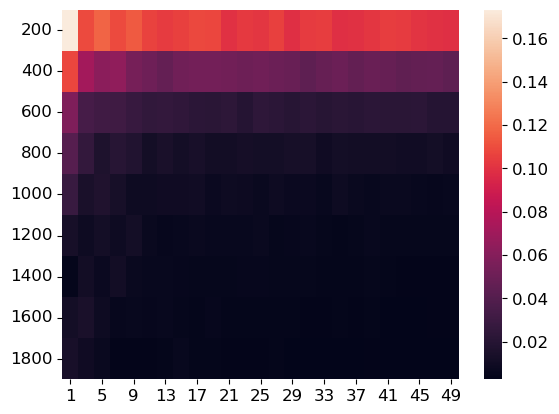

In [281]:
# plot average RMSE for training set
import seaborn as sns
%matplotlib inline

params = pd.DataFrame(param_arr[0].mean(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

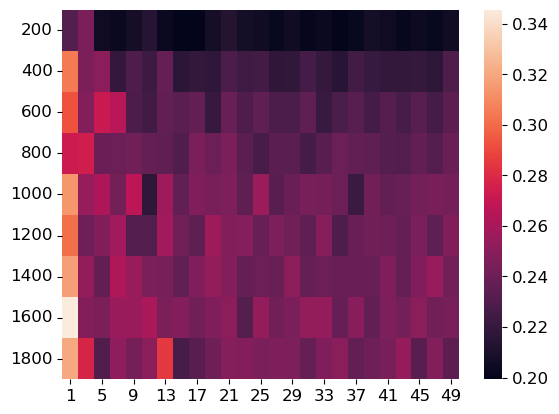

In [282]:
# plot average RMSE for validation set
params = pd.DataFrame(param_arr[1].mean(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

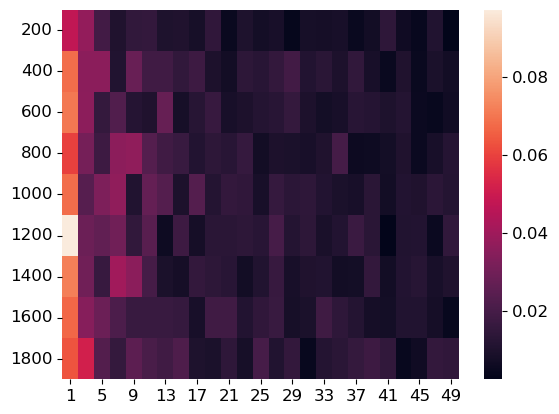

In [283]:
# plot stddev of RMSE for validation set
params = pd.DataFrame(param_arr[1].std(axis=0), index=s_range, columns=n_range)
sns.heatmap(params, annot=False);

In [284]:
to = TabularPandas(mdf, [Categorify, FillMissing, Normalize], cat, cont, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=32)
dls.show_batch()
learn = tabular_learner(dls, loss_func=F.mse_loss, metrics=rmse, layers=[100,100])
#learn.lr_find()

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total
0,23.200001,29.700000,1.0,651.000001,-1.003200e-09,1.499999e+01,20.700000,7.6,995.599975,77.000000,61.599998,46.000000,48.000000,41.299999,33.000000,79.0,51.000000,29.000000,8.0,2.3,-3.692848e-09,29.700001,29.600000,29.600000,0.00
1,22.700001,48.700001,5.0,1388.999990,-1.003200e-09,6.700000e+01,1.600000,7.3,993.599976,62.000000,51.299999,42.000000,49.000000,45.200001,40.000000,93.0,81.000001,50.000000,10.0,4.4,-3.692848e-09,29.600000,29.600000,29.500000,0.00
2,23.200001,30.600000,1.0,872.000002,-1.003200e-09,4.090000e+02,18.700001,7.5,999.200012,85.000001,66.000000,43.000000,54.000000,46.799999,37.000000,86.0,54.000000,31.000000,14.0,6.1,-3.692848e-09,29.799999,29.600000,29.600000,0.00
3,22.600000,42.500000,1.0,963.000000,-1.003200e-09,6.540000e+02,3.200000,7.2,987.400024,74.000000,69.400002,63.000000,66.000000,60.099999,51.000000,90.0,72.800003,51.000000,15.0,8.4,3.000000e+00,29.600000,29.400000,29.299999,0.05
4,22.600000,45.299999,1.0,862.000000,-1.003200e-09,9.999989e-01,5.500000,7.4,991.900024,69.000000,58.700001,47.000000,53.000000,41.799999,34.000000,75.0,54.799999,37.000000,20.0,12.1,5.000000e+00,29.700001,29.600000,29.400000,0.00
5,22.700001,45.099999,1.0,801.000000,-1.003200e-09,1.200000e+02,5.900000,7.4,1001.500000,80.000000,71.300003,63.000000,61.000000,59.299999,57.000001,84.0,67.000000,48.000000,14.0,8.9,5.000000e+00,29.900000,29.799999,29.799999,0.00
6,23.200001,29.700000,1.0,1017.000005,-1.003200e-09,5.740000e+02,15.900000,7.3,995.400024,63.000000,50.700000,35.000000,48.000000,38.000000,30.000000,93.0,67.699997,29.000000,10.0,2.8,-3.692848e-09,29.799999,29.600000,29.500000,0.00
7,22.799999,33.599998,1.0,600.999993,-1.003200e-09,1.999999e+00,19.900000,7.8,1005.799988,76.000000,61.099998,40.000000,43.000000,38.599999,31.000000,97.0,50.599998,20.000001,7.0,2.6,-3.692848e-09,29.900000,29.900000,29.900000,0.00
8,22.700001,53.900001,1.0,723.000002,-1.003200e-09,2.800000e+01,0.900000,7.2,995.299988,60.000000,52.700001,50.000000,58.000000,49.599998,46.000000,96.0,89.199997,77.000001,15.0,11.2,6.000000e+00,29.799999,29.600000,29.400000,0.74
9,23.600000,51.400001,1.0,548.999992,-1.003200e-09,-8.278298e-07,0.900000,7.0,1000.000000,89.000000,82.199996,72.000001,70.999999,69.400002,68.000000,87.0,66.099998,50.000000,12.0,7.4,3.000000e+00,29.799999,29.700001,29.700001,0.00


epoch,train_loss,valid_loss,_rmse,time
0,0.090732,0.075919,0.275534,00:00
1,0.040446,0.070148,0.264855,00:00
2,0.022179,0.068104,0.260967,00:00
3,0.014043,0.050996,0.225824,00:00
4,0.012014,0.050317,0.224313,00:00
5,0.009371,0.066838,0.258531,00:00
6,0.008157,0.041775,0.204389,00:00
7,0.006741,0.040950,0.202360,00:00
8,0.006460,0.038310,0.195731,00:00
9,0.005847,0.045493,0.213291,00:00


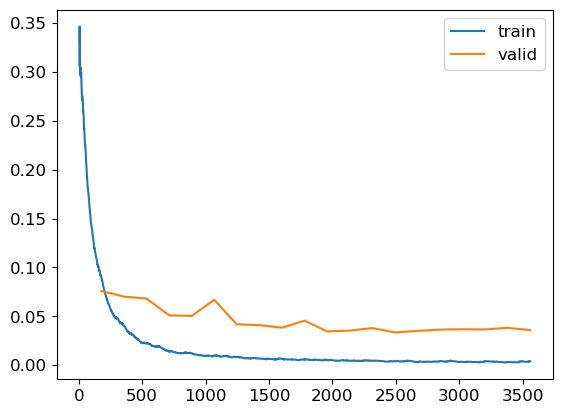

In [285]:
learn.fit_one_cycle(20, 0.001)
learn.recorder.plot_loss()

In [286]:
preds,targs = learn.get_preds()
print("Valid RMSE: %2.2f" % r_mse(preds,targs))

Valid RMSE: 0.19


In [287]:
learn.show_results(max_n=20)

,Temperature,Humidity,PM2.5,CO2,CO,TVOC,NO2,Ozone,Pressure,TempF_Max,TempF_Avg,TempF_Min,DewPointF_Max,DewPointF_Avg,DewPointF_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeedMPH_Max,WindSpeedMPH_Avg,WindSpeedMPH_Min,PressureIN_Max,PressureIN_Avg,PressureIN_Min,PrecipitationIN_Total,PrecipitationIN_Total_pred
0,0.052512,1.639077,-0.235971,1.315750,-0.095721,-0.455763,-0.782605,-1.434450,-0.772685,1.484991,1.277743,1.294361,1.655085,1.672139,1.628890,1.274040,1.420794,0.859256,0.225922,-0.458229,-0.469196,-0.931295,-0.127919,0.139229,0.80,0.031688
1,0.528809,1.034204,-0.235971,-0.468947,-0.095721,-0.593304,-0.782605,-1.434450,-0.679770,1.576566,1.619314,1.583525,1.573618,1.580067,1.694501,0.075165,0.600755,0.524017,-0.155681,0.651770,1.848586,-0.367383,-0.127919,0.139229,0.00,0.022790
2,-1.058841,1.379846,-0.235971,-0.182018,-0.095721,-0.362591,-0.762834,-0.630042,0.791438,0.843968,1.063041,1.005197,0.677481,0.436846,0.447900,-0.939267,-0.691850,-0.615795,-0.346482,-0.312177,-0.469196,0.196518,0.511808,0.182241,0.00,0.222743
3,1.322634,0.569748,-0.235971,0.764847,-0.095721,-0.495695,-0.792491,-0.630042,1.287005,1.759715,2.019441,1.583525,1.410684,1.603085,1.760111,0.444050,0.079543,0.389922,-0.346482,0.184402,0.689695,0.760429,0.831675,0.203747,0.00,-0.003589
4,0.687571,1.390647,-0.235971,1.000128,-0.095721,-0.411396,-0.743063,-1.166314,0.760463,1.576566,1.580278,1.294361,1.492151,1.549376,1.694501,0.997377,0.684148,0.389922,-0.537283,-1.217703,-0.469196,0.196518,0.511808,0.182241,0.00,-0.057312
5,1.481396,1.304236,-0.235971,0.420532,-0.095721,-0.389212,-0.782605,-1.702587,-0.370042,1.484991,1.277743,1.294361,1.655085,1.672139,1.628890,1.274040,1.420794,0.859256,0.225922,-0.458229,-0.469196,-0.931295,-0.127919,0.139229,0.80,0.041192
6,0.052512,0.245708,-0.235971,-0.239404,-0.095721,-0.167372,-0.555239,-0.361906,1.581241,0.294520,0.360380,0.065416,0.025745,0.198994,0.447900,0.536271,-0.163689,-0.079413,-1.109687,-1.188493,-0.469196,1.324341,1.151541,0.225253,0.00,-0.003628
7,-0.265016,1.660680,-0.235971,0.328715,-0.095721,0.240813,-0.802376,-1.166314,0.373303,1.393416,1.404612,1.222070,1.003349,1.104364,1.235227,0.075165,0.037846,-0.012365,-0.918886,-0.984019,-0.469196,0.196518,0.191948,0.160735,0.00,0.013456
8,-0.423782,0.461735,-0.235971,-0.434516,-0.095721,-0.424706,-0.772720,-0.630042,0.667549,1.118692,1.248466,0.860616,1.084816,1.142727,0.972784,-0.201498,0.225482,0.926304,-0.346482,-0.195335,-0.469196,0.196518,0.191948,0.182241,0.00,0.010116
9,0.528809,1.325839,-0.235971,1.338704,-0.095721,-0.429143,-0.733178,-1.434450,-1.051448,1.484991,1.794980,1.583525,1.410684,1.027638,0.775953,0.628492,-0.552861,-0.682843,0.225922,0.388876,-0.469196,-0.931295,-0.447785,0.117723,0.00,0.296972
